In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

How many observations are there in the sample? Discuss the structure of the dataset: how many quantitative and how many qualitative variables do we have? Are there any missing data? (0.5point) • Provide and describe appropriate frequency tables or descriptive statistics for the variables (take into account the type of the variables!) (0.5point). • Present and discuss (where appropriate) variables’ distributions, especially compare them with the normal distribution (e.g. with histograms, density functions, qqplots...). (2points)

In [4]:
# Subtask 1

data = pd.read_csv("earnings.csv", delimiter=';')
print(data.head())
data.describe()

,id,base,bonus,overtime_pay,other,sector,section_07,sex,education,contract,age,duration_total,duration_entity,duration_nominal,duration_overtime
0,192064,26651.53,0.0,0.00,0.00,1,3,2,4,1,49,33.03,7.06,1524.15,0.0
1,25495,40168.50,1500.0,0.00,3414.32,1,2,1,1,1,36,10.07,6.01,1562.40,0.0
2,142164,20134.80,0.0,0.00,1700.41,1,2,2,4,1,52,28.08,19.05,1816.00,0.0
3,198034,16475.00,0.0,0.00,1305.00,1,2,2,5,1,55,35.07,11.01,1816.00,0.0
4,144990,34797.60,0.0,1893.35,3118.73,1,2,2,2,1,50,27.00,19.01,722.80,63.0


In [6]:
print(f"Number of observations is: {len(data)}.")
print(f"There are {len(data.columns)} variables.")
print(f"The variables are: {data.columns.values} in total.")

qual_vars = ['id', 'sector', 'section_07', 'sex', 'education', 'contract']
quant_vars = data.columns.values[~data.columns.isin(qual_vars)]
print(f"There are {len(qual_vars)} qualitative variables and {len(quant_vars)} quantitative variables.")
print(f"The qualitative variables are: {qual_vars}.")
print(f"The quantitative variables are: {quant_vars}.")
print(f"There is no null data:\n{data.isnull().sum()}.")

Number of observations is: 11000
There are 15 variables.
The variables are: ['id' 'base' 'bonus' 'overtime_pay' 'other' 'sector' 'section_07' 'sex'
 'education' 'contract' 'age' 'duration_total' 'duration_entity'
 'duration_nominal' 'duration_overtime'] in total.
There are 6 qualitative variables and 9 quantitative variables.
The qualitative variables are: ['id', 'sector', 'section_07', 'sex', 'education', 'contract']
The quantitative variables are: ['base' 'bonus' 'overtime_pay' 'other' 'age' 'duration_total'
 'duration_entity' 'duration_nominal' 'duration_overtime']


In [8]:
# get frequency tables for qualitative variables
for var in qual_vars:
    print(f"Frequency table for {var}:\n{data[var].value_counts()}\n")

# get descriptive statistics for quantitative variables
for var in quant_vars:
    print(f"Descriptive statistics for {var}:\n{data[var].describe()}\n")

Frequency table for id:
192064    1
150038    1
172121    1
140632    1
61821     1
         ..
55373     1
121822    1
169539    1
102024    1
724       1
Name: id, Length: 11000, dtype: int64

Frequency table for sector:
1    10548
2      452
Name: sector, dtype: int64

Frequency table for section_07:
2    5867
3    2732
1    2401
Name: section_07, dtype: int64

Frequency table for sex:
2    8289
1    2711
Name: sex, dtype: int64

Frequency table for education:
2    6633
4    1983
5     906
3     680
1     430
6     368
Name: education, dtype: int64

Frequency table for contract:
1    9306
2    1694
Name: contract, dtype: int64

Descriptive statistics for base:
count     11000.000000
mean      33376.738065
std       19276.551638
min          10.000000
25%       20995.115000
50%       31341.245000
75%       41348.290000
max      241624.390000
Name: base, dtype: float64

Descriptive statistics for bonus:
count     11000.000000
mean       2128.486176
std        4966.444726
min          

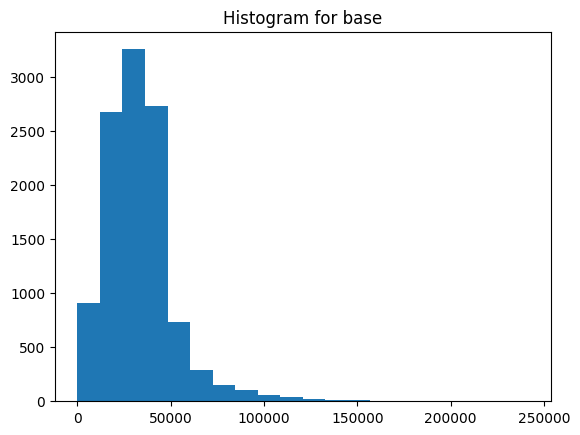

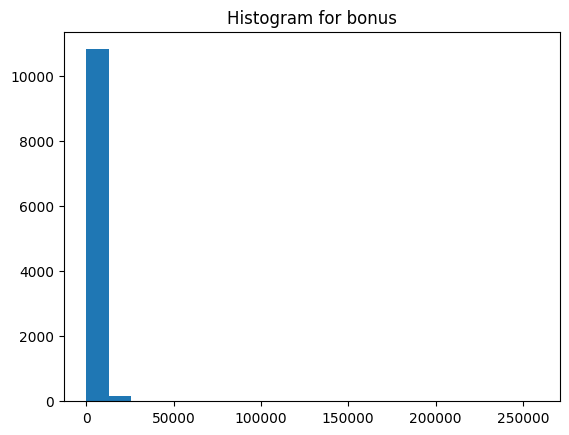

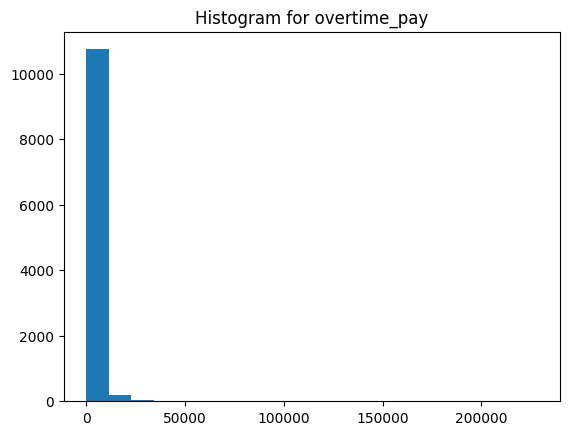

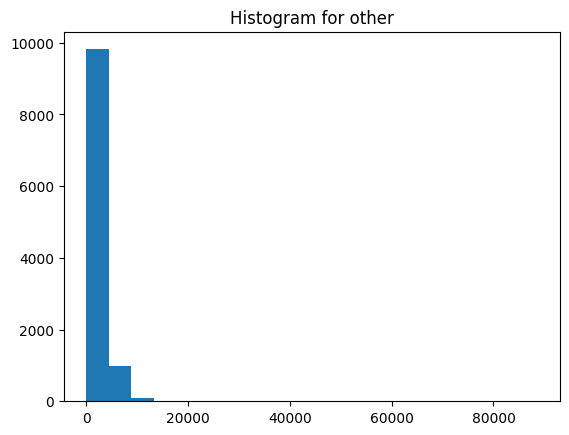

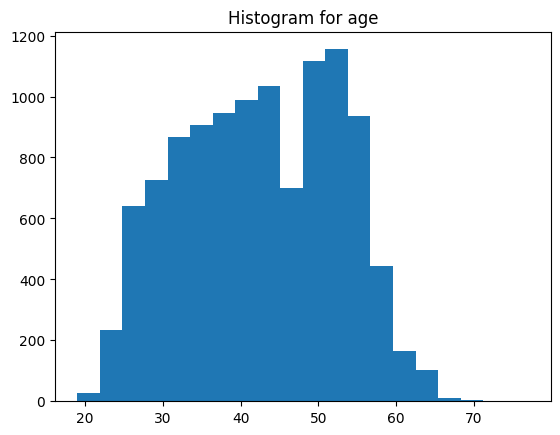

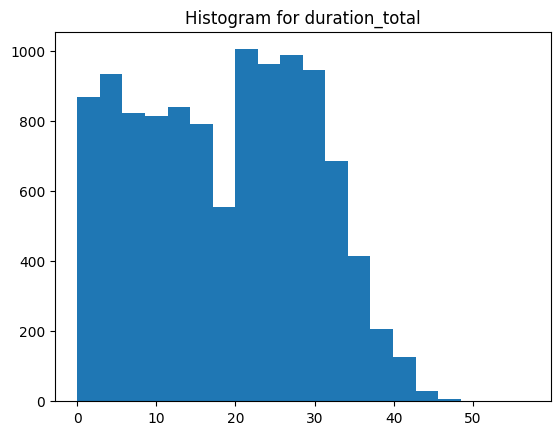

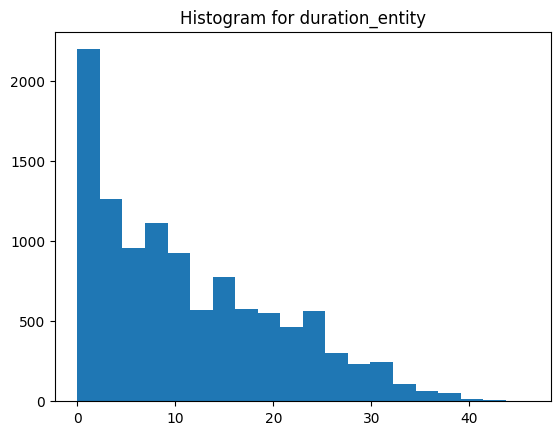

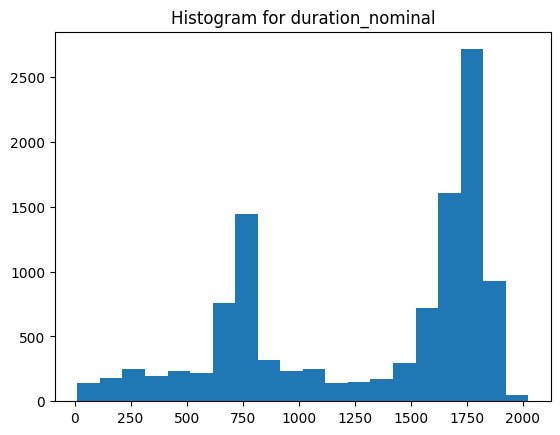

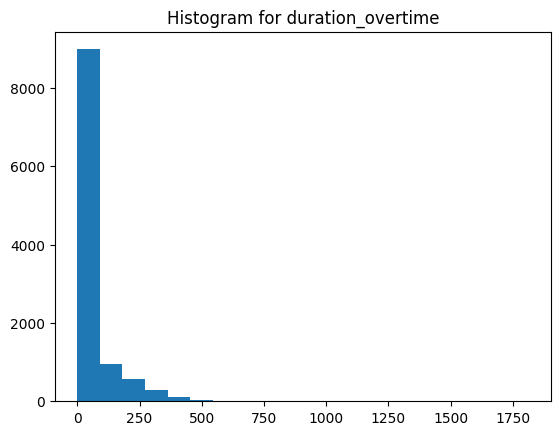

In [14]:
# Histograms for quantitative variables separate plots
for var in quant_vars:
    plt.hist(data[var], bins=20)
    plt.title(f"Histogram for {var}")
    plt.show()

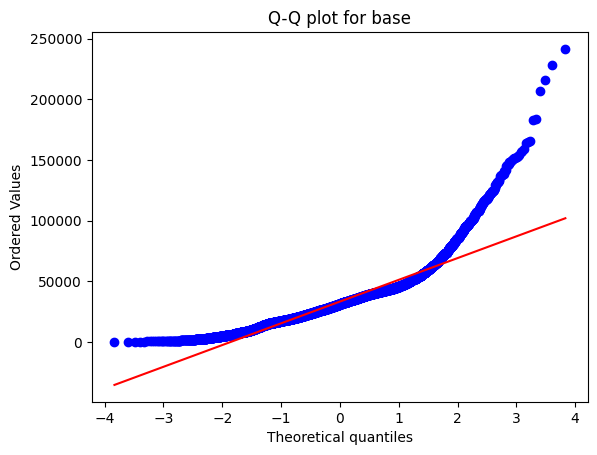

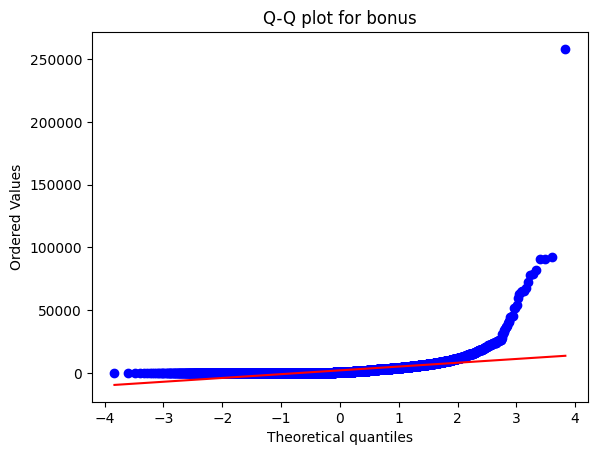

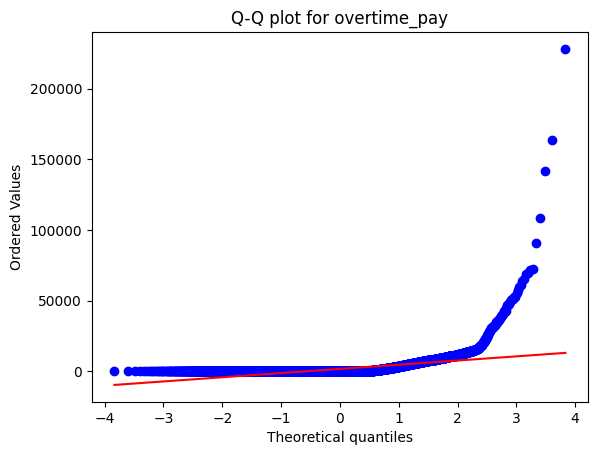

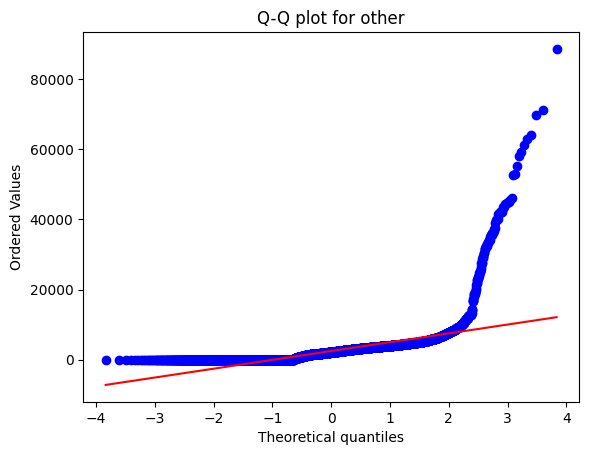

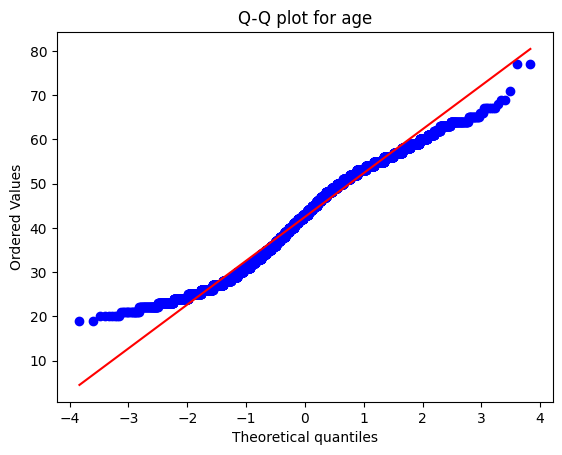

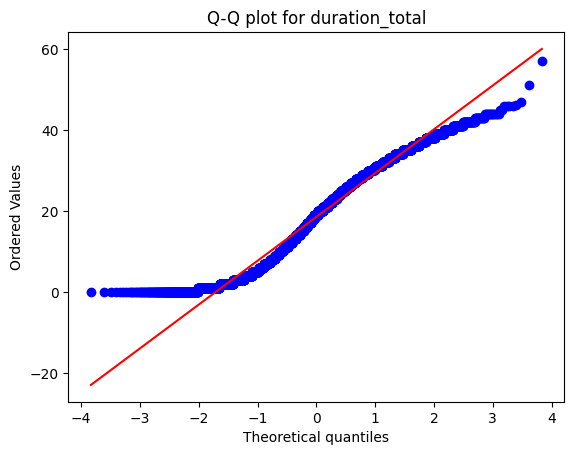

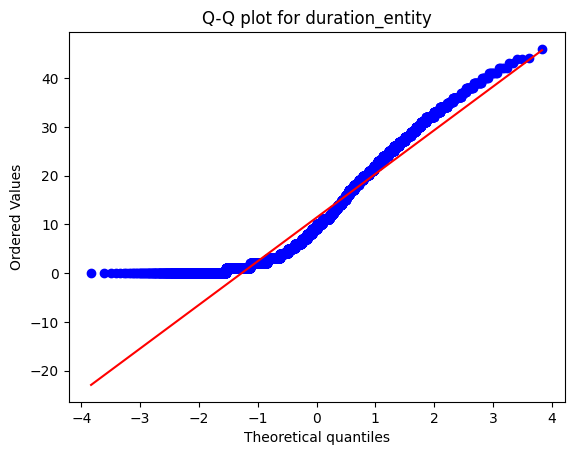

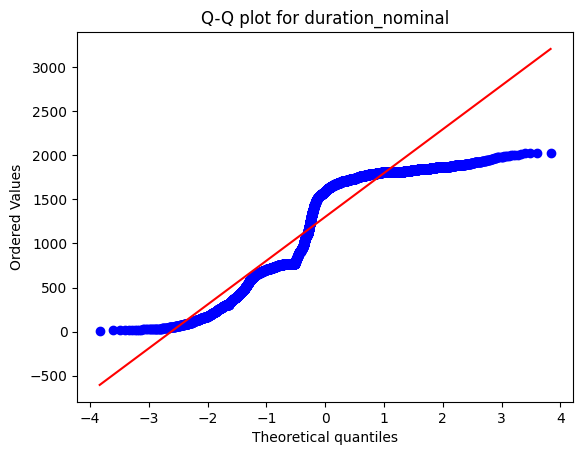

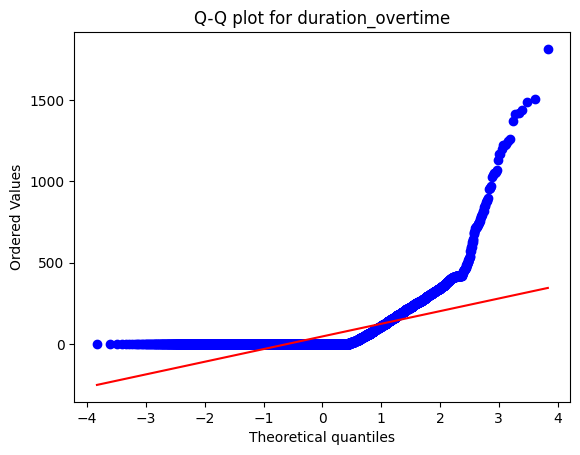

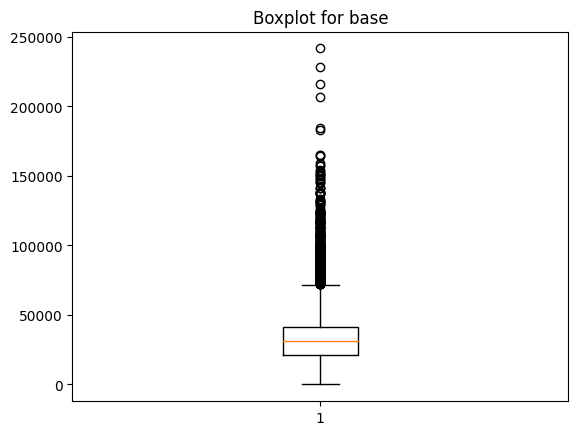

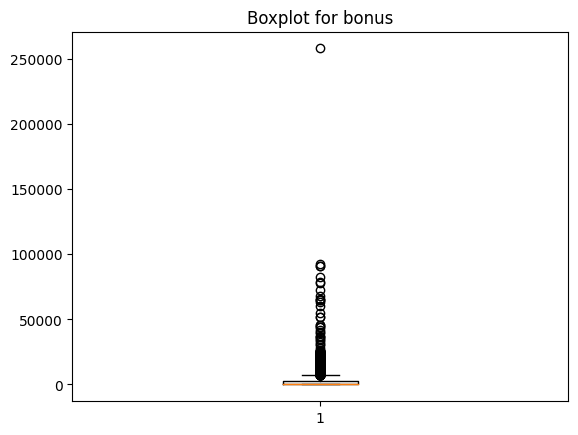

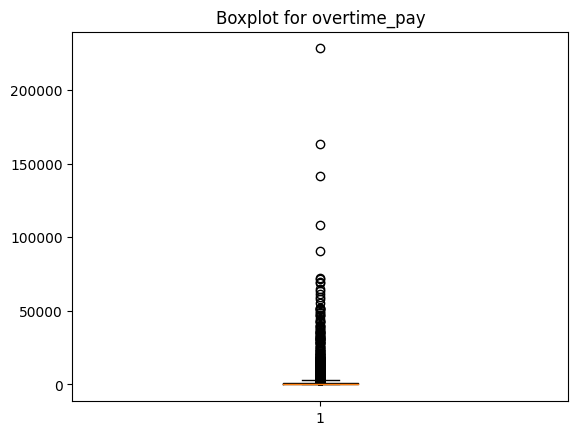

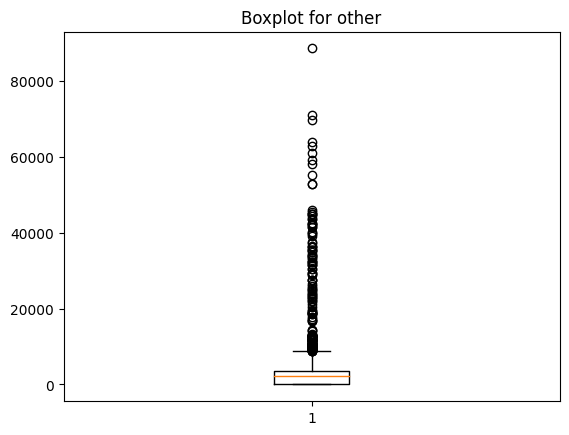

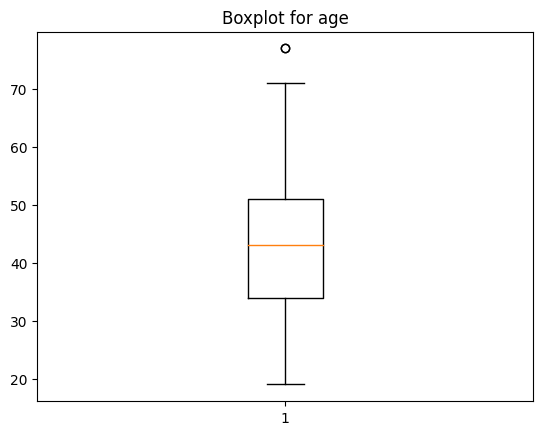

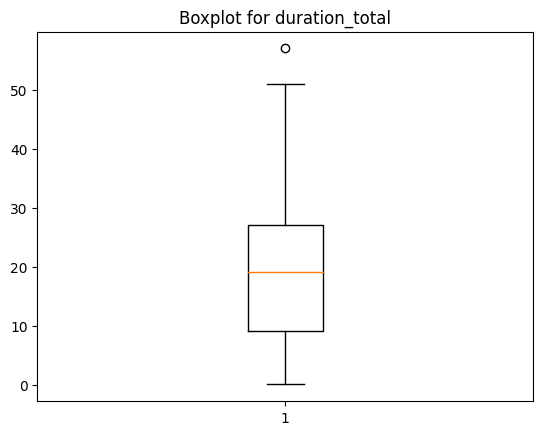

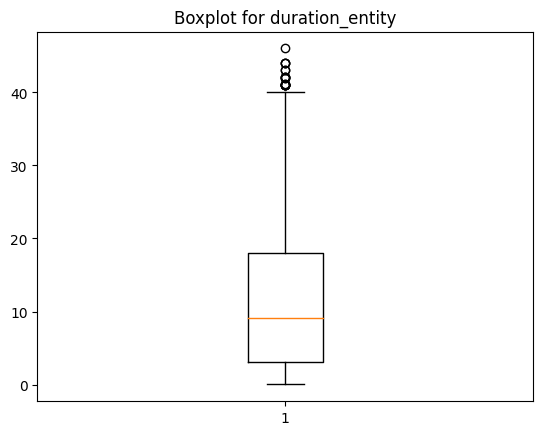

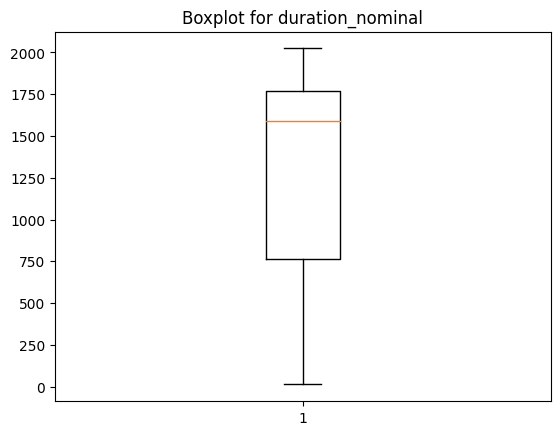

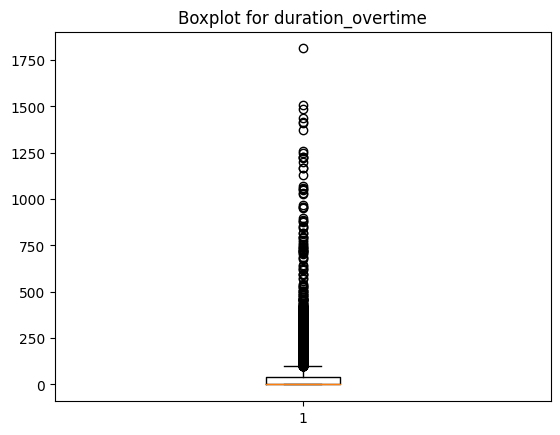

In [15]:
# Q-Q plots for quantitative variables
for var in quant_vars:
    stats.probplot(data[var], dist="norm", plot=plt)
    plt.title(f"Q-Q plot for {var}")
    plt.show()

# Get boxplots for quantitative variables
for var in quant_vars:
    plt.boxplot(data[var])
    plt.title(f"Boxplot for {var}")
    plt.show()